# Selfweight of a Mesh

During equilibrium calculations the selfweight of a cablenet/mesh/... is lumped to the vertices to be able to apply it there as a point load. Computing the selfweight of the "geometry" is easily done by computing the volume using an offset of the geometry along the vertex normals according to the thickness of the geometry at the node. However, to be able to lump the weight to the vertices, we need to discretise the weight and figure out how much of it is carried by each node.

**Construct a mesh**

In [14]:
import compas
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

In [15]:
mesh = Mesh.from_obj(compas.get('faces.obj'))

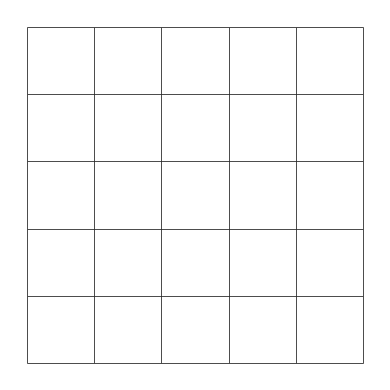

In [21]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_edges(width=0.5)
plotter.show()

<Figure size 432x288 with 0 Axes>

**Vertex areas**

In [18]:
areas = [mesh.vertex_area(key) for key in mesh.vertices()]

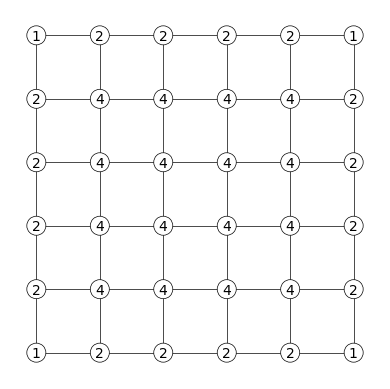

In [19]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_edges(width=0.5)
plotter.draw_vertices(text={key: "{:.0f}".format(mesh.vertex_area(key)) for key in mesh.vertices()},
                      radius=0.3)
plotter.show()

## Procedure

For any vertex

* Find vertex neighbors
* For every neighbor
  * Find the adjacent faces
  * For every adjacent face
    * Decompose into triangles using centroid
    * Compute area of triangle connected to the vertex

=> Sum up all triangle areas

**1. Select a vertex**

In [20]:
vertex = random.choice(list(mesh.vertices()))

NameError: name 'random' is not defined

In [ ]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(keys=[vertex], text='key', facecolor={vertex: (255, 0, 0)}, radius=0.3)
plotter.draw_edges(width=0.5)
plotter.show()

**2. Find vertex neighbors**

In [ ]:
mesh.vertex_neighbors(vertex)

In [ ]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(radius=0.1, facecolor={14: (255, 0, 0)}, keys=[14])
plotter.draw_edges(width=0.5)
plotter.draw_arrows2(arrows)
plotter.show()

**4. Compute total area of connected triangles**

In [ ]:
from compas.geometry import subtract_vectors
from compas.geometry import cross_vectors
from compas.geometry import length_vector

In [ ]:
# TODO: visualise p0, p1, v1, p2, v2, area for both halfedges

In [ ]:
area = 0

p0 = mesh.vertex_coordinates(vertex)

for nbr in mesh.vertex_neighbors(vertex):
    p1 = mesh.vertex_coordinates(nbr)
    v1 = subtract_vectors(p1, p0)
    
    face = mesh.halfedge[vertex][nbr]
    if face is not None:
        p2 = mesh.face_centroid(face)
        v2 = subtract_vectors(p2, p0)
        area += 0.25 * length_vector(cross_vectors(v1, v2)) 
    
    face = mesh.halfedge[nbr][vertex]
    if face is not None:
        p3 = mesh.face_centroid(face)
        v3 = subtract_vectors(p3, p0)
        area += 0.25 * length_vector(cross_vectors(v1, v3))

print(area == mesh.vertex_area(vertex))

## Tributary area

The "tributary area" or "vertex area" of a vertex in a mesh is the area of the polygon defined by the midpoints of the connected edges and the centroids of the connected faces, sorted in either counter-clockwise or clockwise order.

In [ ]:
mesh.vertex_area(vertex)

In [ ]:
centroids = []
for face in mesh.vertex_faces(vertex):
    centroid = mesh.face_centroid(face)
    centroids.append(centroid)

In [ ]:
midpoints = []
for nbr in mesh.vertex_neighbors(vertex):
    midpoint = mesh.edge_midpoint(vertex, nbr)
    midpoints.append(midpoint)

In [ ]:
polygon = []
for nbr in mesh.vertex_neighbors(vertex, ordered=True)[::-1]:
    face = mesh.halfedge[vertex][nbr]
    if face is None:
        continue
    polygon.append(mesh.edge_midpoint(vertex, nbr))
    polygon.append(mesh.face_centroid(face))

In [ ]:
area_polygon(polygon)

In [ ]:
arrows = []
for nbr in mesh.vertex_neighbors(vertex):
    arrows.append({'start': mesh.vertex_coordinates(vertex), 'end': mesh.vertex_coordinates(nbr)})
    
points = []
for point in centroids:
    points.append({'pos': point, 'radius': 0.1})
for point in midpoints:
    points.append({'pos': point, 'radius': 0.05})

polygons = [{'points': polygon, 'facecolor': (255, 180, 180)}]

In [ ]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(radius=0.1, facecolor={14: (255, 0, 0)}, keys=[14])
plotter.draw_edges(width=0.5)
plotter.draw_arrows2(arrows)
plotter.draw_points(points)
plotter.draw_polygons(polygons)
plotter.show()